In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import math

In [5]:
def get_loss_from_log(path, data):
    metadata_file = path + "\\" + data
    with open(metadata_file) as f:
        lines = f.readlines()

    Train_loss_list = []
    Valid_loss_list = []

    for i in range(len(lines)):
        if "Train Epoch" in lines[i]:
            #Train_loss = int(re.findall(r'-?\d+', lines[i])[-2])
            Train_loss = float(lines[i][(lines[i].find("loss")) + 5:])
            Train_loss_list.append(Train_loss)
        if "Valid: loss" in lines[i]:
            Valid_loss = float(lines[i][13:])
            Valid_loss_list.append(Valid_loss)

    a= int(len(Train_loss_list) / len(Valid_loss_list))
    Train_loss_list = Train_loss_list[a - 1::a]

    return Train_loss_list, Valid_loss_list

In [6]:
list1,list2 = get_loss_from_log("trained_data_without_weight","log_info.txt")

In [11]:
list3,list4 = get_loss_from_log("trained_data_with_weight","log_info.txt")

In [14]:
def show_diff(list1, list2, list3, list4, start=None):
    plt.figure(figsize=(30, 20), dpi=80)
    plt.ylim = max(max(list1), max(list3)) * 1.1
    plt.xlim = len(list2) * 1.1

    plt.plot(list1[start:], label="train_loss without weighted Cross Entropy", c="r", marker=".")
    plt.plot(list2[start:], label="valid_loss without weighted Cross Entropy", c="r", marker=".", alpha=0.3)

    plt.plot(list3[start:], label="train_loss with weighted Cross Entropy", c="g", marker=".")
    plt.plot(list4[start:], label="valid_loss with weighted Cross Entropy", c="g", marker=".", alpha=0.3)

    plt.legend(loc="upper right", fontsize="30")

    plt.title("Comparison LOSS(cls+pts) w/o weighted Cross Entropy" + "\n" +
              "from epoch {} to epoch {}".format(start, len(list1) - 1), fontsize="30")

    plt.show()

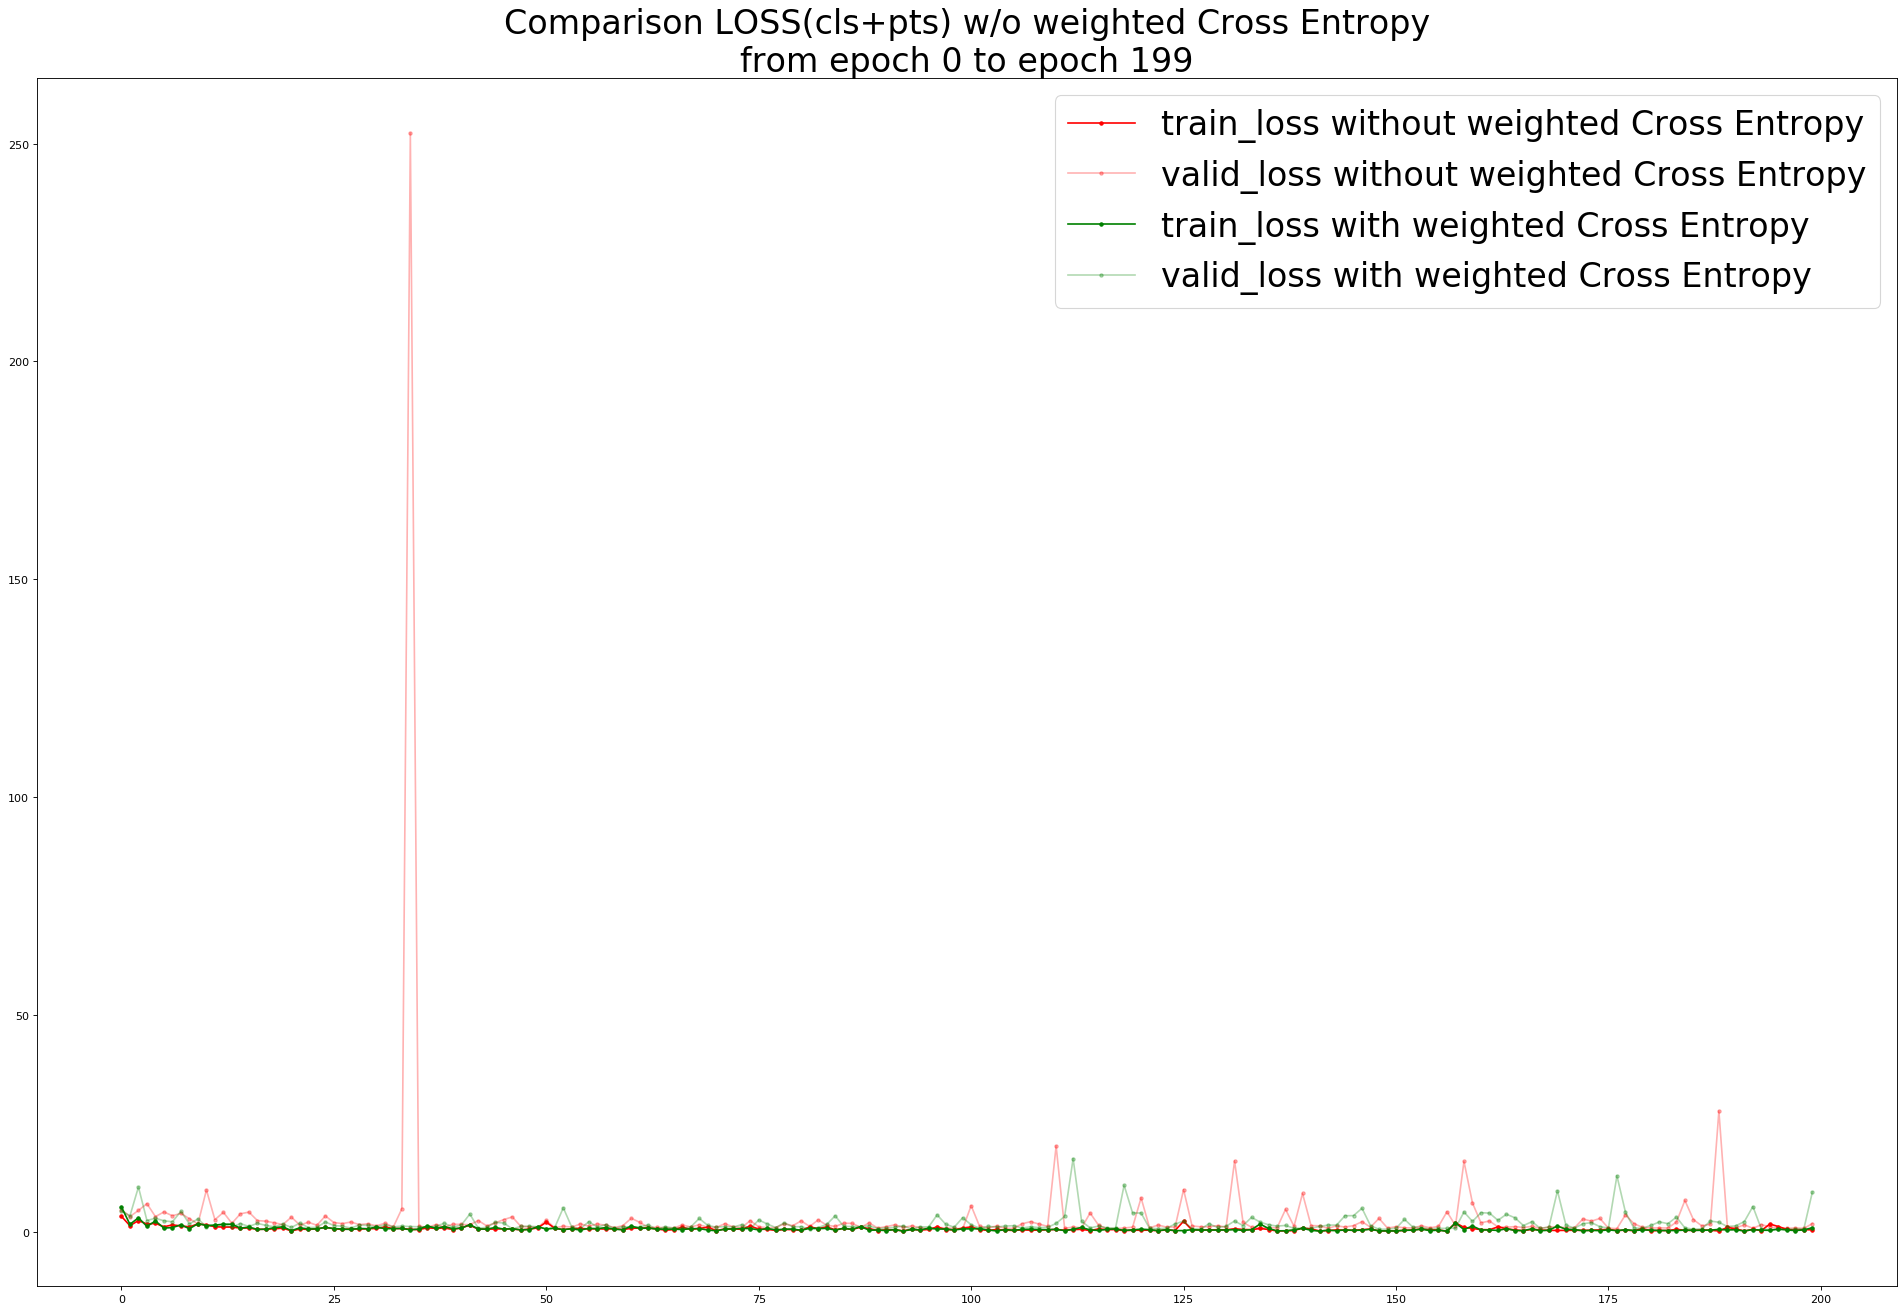

In [15]:
show_diff(list1, list2, list3, list4, start=0)

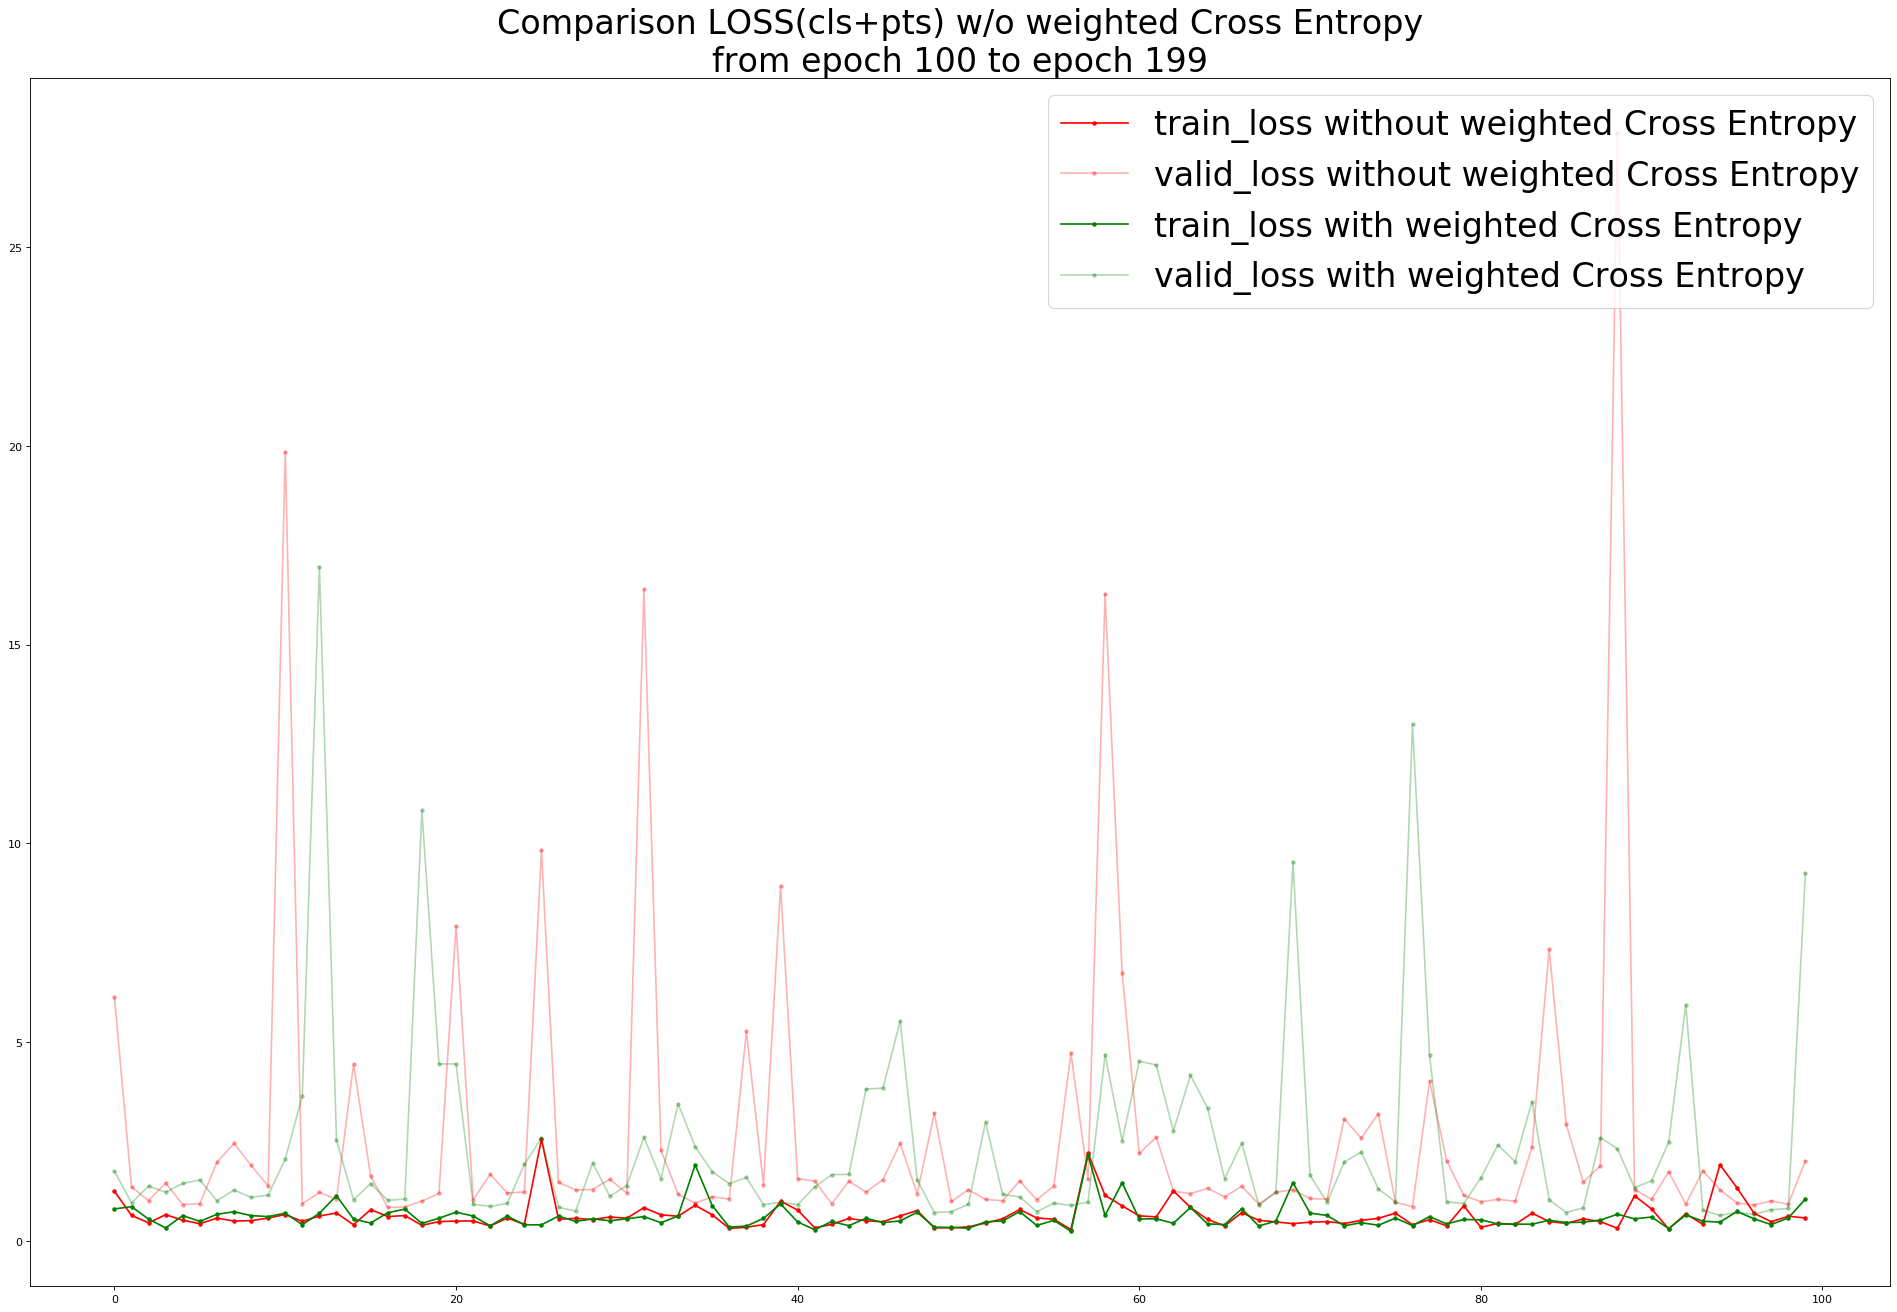

In [16]:
show_diff(list1, list2, list3, list4, start=100)